In [13]:
import time
start = time.perf_counter()

In [14]:
import time
from scipy.stats import kurtosis
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, auc, confusion_matrix, roc_curve, roc_auc_score, recall_score, f1_score, classification_report, precision_score, homogeneity_score, normalized_mutual_info_score, davies_bouldin_score, mean_squared_error, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from kmodes.kmodes import KModes

In [15]:
np.random.seed(903967645)

In [16]:
phishing_dataset = pd.read_csv('../data/phishing_dataset.csv')
print(phishing_dataset.info())
phishing_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [17]:
# Check shape of dataset and for null data
print(phishing_dataset.shape)
phishing_dataset.isna().any().any()

(11055, 32)


False

In [18]:
phishing_dataset = phishing_dataset.sample(frac=0.1, random_state=42)

# Separate features and target
train_X = phishing_dataset.drop(columns=['Result', 'Favicon', 'Shortining_Service', 'popUpWidnow', 'double_slash_redirecting'])
train_y = phishing_dataset['Result']

# Normalize the feature data
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(train_X)

# Convert back to DataFrame
train_X = pd.DataFrame(X_scaled, columns=train_X.columns)
print(train_X.shape)

(1106, 27)


In [7]:
print(train_X.head())

      index  having_IPhaving_IP_Address  URLURL_Length  having_At_Symbol  \
0  0.957376                         0.0            0.0               1.0   
1  0.681448                         0.0            0.0               1.0   
2  0.977647                         0.0            1.0               1.0   
3  0.270498                         1.0            0.0               1.0   
4  0.808778                         1.0            0.0               1.0   

   Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0            0.0                0.0             0.5   
1            0.0                0.5             0.0   
2            0.0                1.0             0.0   
3            0.0                0.5             1.0   
4            0.0                1.0             1.0   

   Domain_registeration_length  port  HTTPS_token  ...  on_mouseover  \
0                          0.0   1.0          1.0  ...           1.0   
1                          0.0   1.0          1.0  ...           1.0

In [8]:
dims = list(range(2, 28, 1))

For dimension=2, the rc_err is 0.5425876816488561
For dimension=3, the rc_err is 0.5295904244022936
For dimension=4, the rc_err is 0.5180667046191181
For dimension=5, the rc_err is 0.5078125495325223
For dimension=6, the rc_err is 0.4987357880194474
For dimension=7, the rc_err is 0.491717529934314
For dimension=8, the rc_err is 0.4850857303169764
For dimension=9, the rc_err is 0.4791179642621852
For dimension=10, the rc_err is 0.47367098754440073
For dimension=11, the rc_err is 0.46884933125845785
For dimension=12, the rc_err is 0.464427933796247
For dimension=13, the rc_err is 0.4602972409589763
For dimension=14, the rc_err is 0.456284060497832
For dimension=15, the rc_err is 0.45262582950277214
For dimension=16, the rc_err is 0.44968346520210595
For dimension=17, the rc_err is 0.44690251837930184
For dimension=18, the rc_err is 0.44442389402024807
For dimension=19, the rc_err is 0.4422696546564058
For dimension=20, the rc_err is 0.44020618008759177
For dimension=21, the rc_err is 0.4

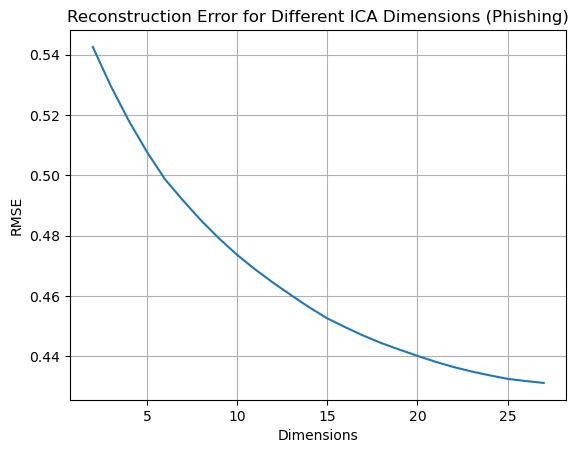

CPU times: user 9min 8s, sys: 41.8 s, total: 9min 50s
Wall time: 1min 3s


In [11]:
%%time
rc_errors = {}
for dim in dims:
    ica = FastICA(n_components=dim, random_state=42)
    x_prime = ica.fit_transform(train_X.values)

    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(train_X.values, reconstructed)
    rc_errors[dim] = rc_err
    print(f"For dimension={dim}, the rc_err is {rc_err}")


plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()))
plt.xlabel('Dimensions')
plt.ylabel('RMSE')
plt.title('Reconstruction Error for Different ICA Dimensions (Phishing)')
plt.grid(True)
plt.savefig('../images/phishing-ica-rmse.png')
plt.show()

In [19]:
%%time
comp = 5
ica = FastICA(n_components=comp, random_state=42, max_iter=1000)
ica_result = ica.fit_transform(train_X.values)
for i in range(comp):
    field_name = "ica-"+str(i)
    train_X[field_name] = ica_result[:,i]
    phishing_dataset[field_name] = ica_result[:,i]
train_X_ica = ica_result

CPU times: user 231 ms, sys: 143 ms, total: 374 ms
Wall time: 50.9 ms


In [20]:
kurtosis_values = kurtosis(ica_result, fisher=True)

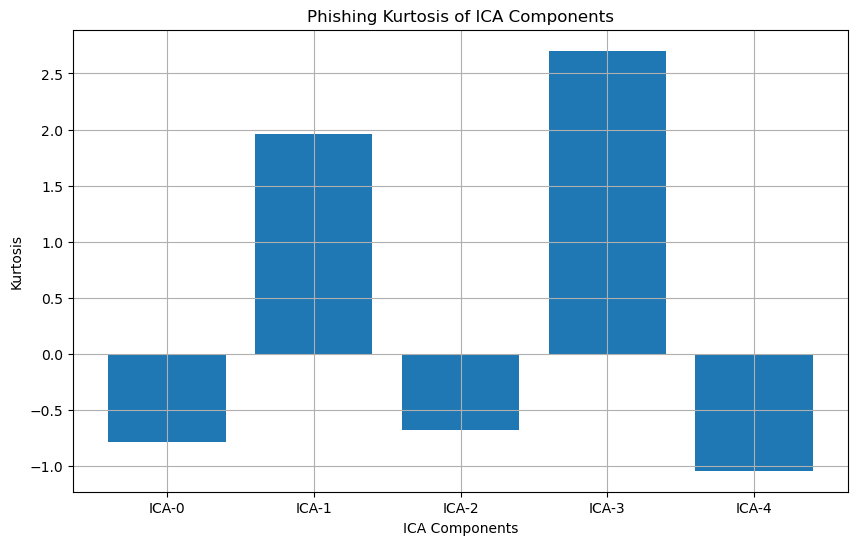

In [21]:
# Plot kurtosis values
plt.figure(figsize=(10, 6))
plt.bar(range(comp), kurtosis_values, tick_label=[f'ICA-{i}' for i in range(comp)])
plt.xlabel('ICA Components')
plt.ylabel('Kurtosis')
plt.title('Phishing Kurtosis of ICA Components')
plt.grid(True)
plt.savefig('../images/phishing-ica-kurtosis.png')
plt.show()

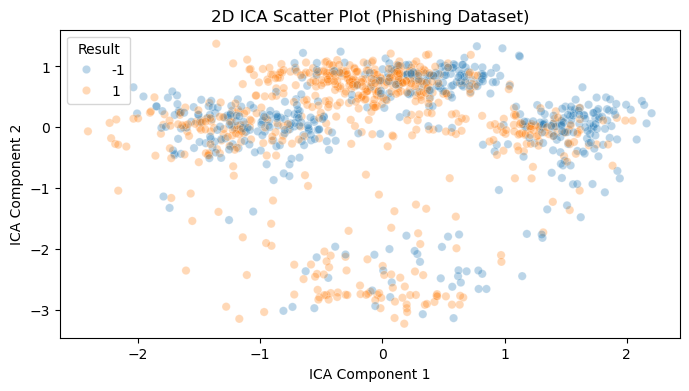

In [22]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    x='ica-0', y='ica-1',
    hue='Result',
    palette=sns.color_palette('tab10', 2),
    data=phishing_dataset,
    legend='full',
    alpha=0.3
)
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.title('2D ICA Scatter Plot (Phishing Dataset)')
plt.savefig('../images/phishing-ica-2d.png')
plt.show()

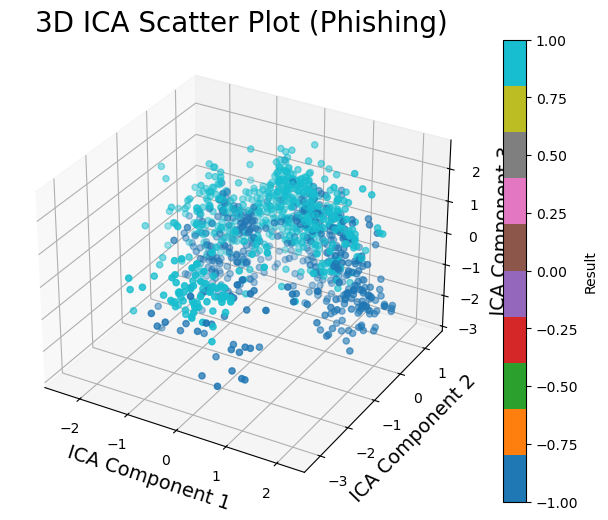

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    xs=phishing_dataset["ica-0"], 
    ys=phishing_dataset["ica-1"], 
    zs=phishing_dataset["ica-2"], 
    c=phishing_dataset["Result"], 
    cmap='tab10'
)
ax.set_xlabel('ICA Component 1', size=14)
ax.set_ylabel('ICA Component 2', size=14)
ax.set_zlabel('ICA Component 3', size=14)
plt.colorbar(scatter, ax=ax, label='Result')
plt.title('3D ICA Scatter Plot (Phishing)', size=20)
plt.savefig('../images/phishing-ica-3d.png')
plt.show()

# Clustering

For n_clusters=2, The Davies-Bouldin Index is 0.8122329446207059
For n_clusters=2, The Adjusted Rand Index is -0.00041661193161559104
For n_clusters=2, The homogeneity_score is 0.0007542086834907142
For n_clusters=3, The Davies-Bouldin Index is 1.2246786319556178
For n_clusters=3, The Adjusted Rand Index is 0.001085880073333595
For n_clusters=3, The homogeneity_score is 0.002202306659772839
For n_clusters=4, The Davies-Bouldin Index is 1.1323169359866816
For n_clusters=4, The Adjusted Rand Index is -0.0002953398541871731
For n_clusters=4, The homogeneity_score is 0.0026073225172507765
For n_clusters=5, The Davies-Bouldin Index is 1.1034612258586576
For n_clusters=5, The Adjusted Rand Index is 0.0012068611660100911
For n_clusters=5, The homogeneity_score is 0.004056418933597136
For n_clusters=6, The Davies-Bouldin Index is 0.8695610649120419
For n_clusters=6, The Adjusted Rand Index is -0.0020498488863699483
For n_clusters=6, The homogeneity_score is 0.0037802790885598696
For n_clusters

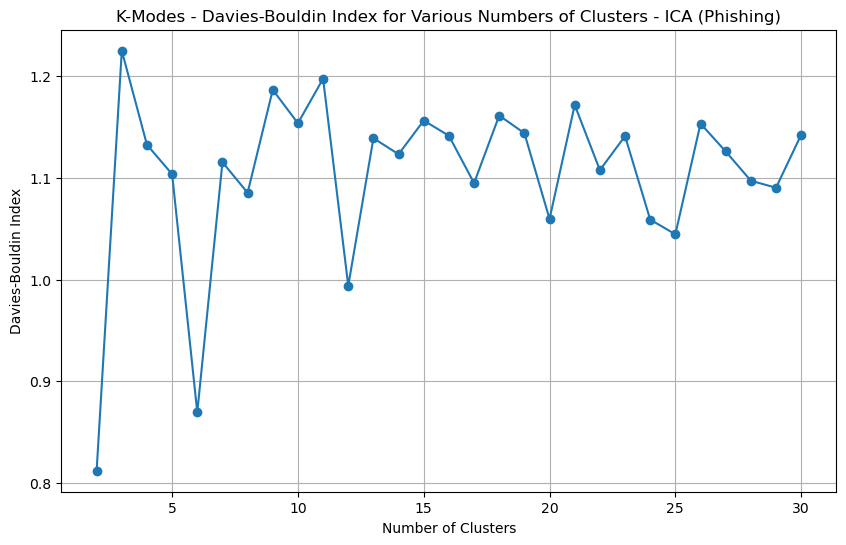

CPU times: user 7min 9s, sys: 30 s, total: 7min 39s
Wall time: 21min 49s


In [58]:
%%time
davies_bouldin_scores_KM = {}
adjusted_rand_scores_KM = {}
homogeneity_scores_KM = {}

for cluster in range(2, 31, 1):
    kmodes = KModes(n_clusters=cluster, init='Huang', n_init=10, max_iter=25, random_state=42).fit(train_X_ica)
    label = kmodes.labels_
    
    # Calculate Davies-Bouldin Index
    db_score = davies_bouldin_score(train_X_ica, label)
    # Calculate Adjusted Rand Index
    ari_score = adjusted_rand_score(train_y, label)
    # Calculate Homogeneity Score
    homog_score = homogeneity_score(train_y, label)
    
    davies_bouldin_scores_KM[cluster] = db_score
    adjusted_rand_scores_KM[cluster] = ari_score
    homogeneity_scores_KM[cluster] = homog_score
    
    print(f"For n_clusters={cluster}, The Davies-Bouldin Index is {db_score}")
    print(f"For n_clusters={cluster}, The Adjusted Rand Index is {ari_score}")
    print(f"For n_clusters={cluster}, The homogeneity_score is {homog_score}")

# Plotting Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(list(davies_bouldin_scores_KM.keys()), list(davies_bouldin_scores_KM.values()), marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("K-Modes - Davies-Bouldin Index for Various Numbers of Clusters - ICA (Phishing)")
plt.grid(True)
plt.savefig('../images/phishing-ica-kmodes-davies-bouldin-index.png')
plt.show()

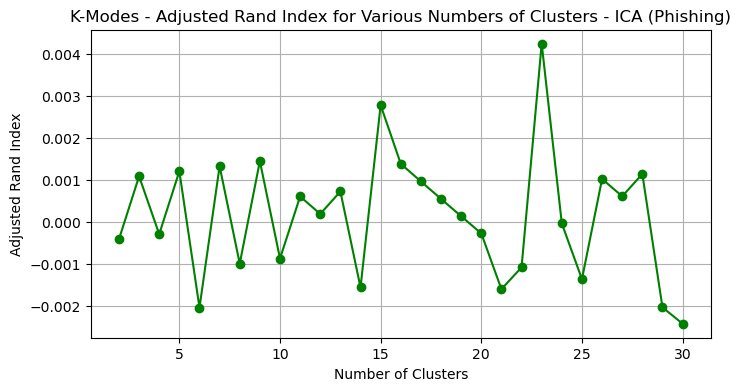

In [59]:
# Plotting Adjusted Rand Index
plt.figure(figsize=(8, 4))
plt.plot(list(adjusted_rand_scores_KM.keys()), list(adjusted_rand_scores_KM.values()), marker='o', color='g')
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted Rand Index")
plt.title("K-Modes - Adjusted Rand Index for Various Numbers of Clusters - ICA (Phishing)")
plt.grid(True)
plt.savefig('../images/phishing-ica-kmodes-adjusted-rand-index.png')
plt.show()

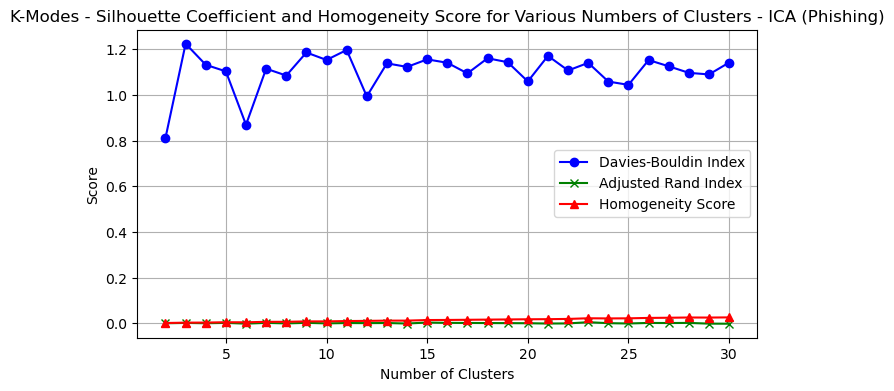

In [60]:
# Plotting Davies-Bouldin Index, Adjusted Rand Index, and Homogeneity Score together
plt.figure(figsize=(8, 4))
plt.plot(list(davies_bouldin_scores_KM.keys()), list(davies_bouldin_scores_KM.values()), 'b', label='Davies-Bouldin Index', marker='o')
plt.plot(list(adjusted_rand_scores_KM.keys()), list(adjusted_rand_scores_KM.values()), 'g', label='Adjusted Rand Index', marker='x')
plt.plot(list(homogeneity_scores_KM.keys()), list(homogeneity_scores_KM.values()), 'r', label='Homogeneity Score', marker='^')
plt.legend(loc='best')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('K-Modes - Silhouette, Rand Index, Homogenity Scores for Various Numbers of Clusters - ICA')
plt.grid(True)
plt.savefig('../images/phishing-ica-kmodes-silhouette-and-homogeneity.png')
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.1581183608722634
For n_clusters=2, The homogeneity_score is 0.0010084576089002067
For n_clusters=2, The log_likeliehood score is -15.392611713719763
For n_clusters=3, The Silhouette Coefficient is 0.16092523098730752
For n_clusters=3, The homogeneity_score is 0.000492289604924783
For n_clusters=3, The log_likeliehood score is -10.852347075785703
For n_clusters=4, The Silhouette Coefficient is 0.09225542383597152
For n_clusters=4, The homogeneity_score is 0.12465436402522048
For n_clusters=4, The log_likeliehood score is -8.654590364355588
For n_clusters=5, The Silhouette Coefficient is 0.020586475075315705
For n_clusters=5, The homogeneity_score is 0.04122966347715752
For n_clusters=5, The log_likeliehood score is -6.244774339939994
For n_clusters=6, The Silhouette Coefficient is 0.026355391778256135
For n_clusters=6, The homogeneity_score is 0.02411714178594712
For n_clusters=6, The log_likeliehood score is 12.295776086888791
For n_clu

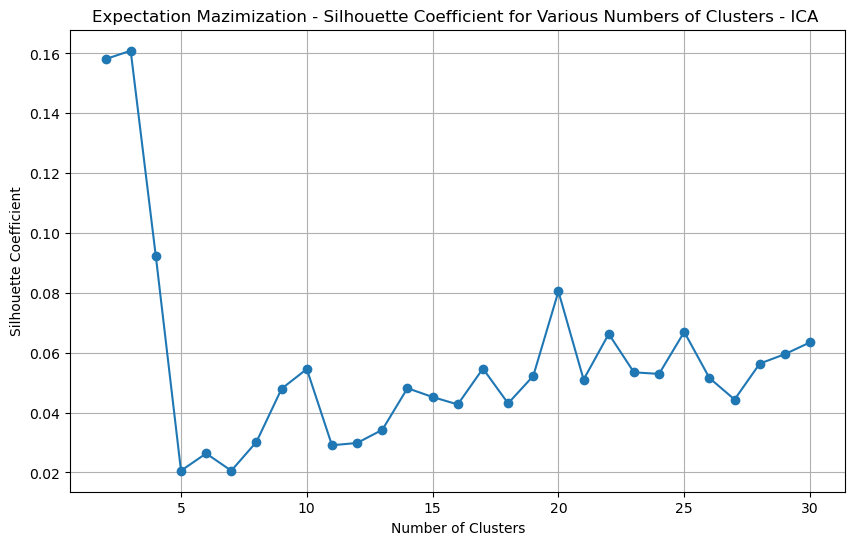

CPU times: user 3h 3min 14s, sys: 2h 17min 4s, total: 5h 20min 18s
Wall time: 34min 27s


In [64]:
%%time
clusters = list(range(2, 31))
silhouette_coeffs_EM = {}
homogeneity_scores_EM = {}
log_likelihood_EM = {}

for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, n_init=10, max_iter=100, random_state=42).fit(train_X_ica)
    label = gmm.predict(train_X_ica)
    sil_coeff = silhouette_score(train_X_ica, label, metric='euclidean')
    homog_score = homogeneity_score(train_y, label)
    log_likelihood = gmm.score(train_X_ica)
    silhouette_coeffs_EM[cluster] = sil_coeff
    homogeneity_scores_EM[cluster] = homog_score
    log_likelihood_EM[cluster] = log_likelihood
    print(f"For n_clusters={cluster}, The Silhouette Coefficient is {sil_coeff}")
    print(f"For n_clusters={cluster}, The homogeneity_score is {homog_score}")
    print(f"For n_clusters={cluster}, The log_likeliehood score is {log_likelihood}")

    
# Plotting Silhouette Coefficients
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_coeffs_EM.keys()), list(silhouette_coeffs_EM.values()), marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Expectation Mazimization - Silhouette Coefficient for Various Numbers of Clusters - ICA ")
plt.grid(True)
plt.savefig('../images/phishing-ica-em-silhouette-coefficients.png')
plt.show()

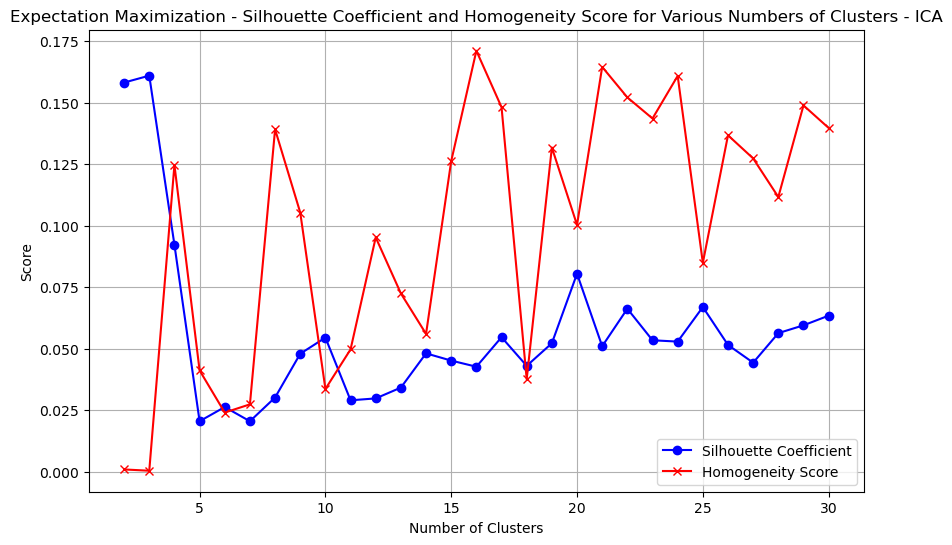

In [65]:
# Plotting Silhouette Coefficient and Homogeneity Score
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_coeffs_EM.keys()), list(silhouette_coeffs_EM.values()), 'b', label='Silhouette Coefficient', marker='o')
plt.plot(list(homogeneity_scores_EM.keys()), list(homogeneity_scores_EM.values()), 'r', label='Homogeneity Score', marker='x')
plt.legend(loc='best')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Expectation Maximization - Silhouette Coefficient and Homogeneity Score for Various Numbers of Clusters - ICA')
plt.grid(True)
plt.savefig('../images/phishing-ica-em-silhouette-homogeneity.png')
plt.show()

In [17]:
kmodes = KModes(n_clusters=5, random_state=42)
kmodes.fit(train_X_ica)
kmodes_labels = kmodes.labels_

In [18]:
train_X['KModes_Cluster'] = kmodes_labels

In [19]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(train_X_ica)
gmm_labels = gmm.predict(train_X_ica)

In [20]:
train_X['GMM_Cluster'] = gmm_labels
print(train_X.head())

      index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0  0.957376                         0.0            0.0                 1.0   
1  0.681448                         0.0            0.0                 1.0   
2  0.977647                         0.0            1.0                 1.0   
3  0.270498                         1.0            0.0                 1.0   
4  0.808778                         1.0            0.0                 1.0   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0               1.0                       1.0            0.0   
1               1.0                       1.0            0.0   
2               1.0                       1.0            0.0   
3               1.0                       1.0            0.0   
4               1.0                       1.0            0.0   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                0.0             0.5                          0.0  ...  

In [23]:
features_to_plot = ['ica-0', 'ica-1']
# Get unique clusters for KMeans and GMM
unique_clusters_kmodes = np.unique(train_X['KModes_Cluster'])
unique_clusters_gmm = np.unique(train_X['GMM_Cluster'])

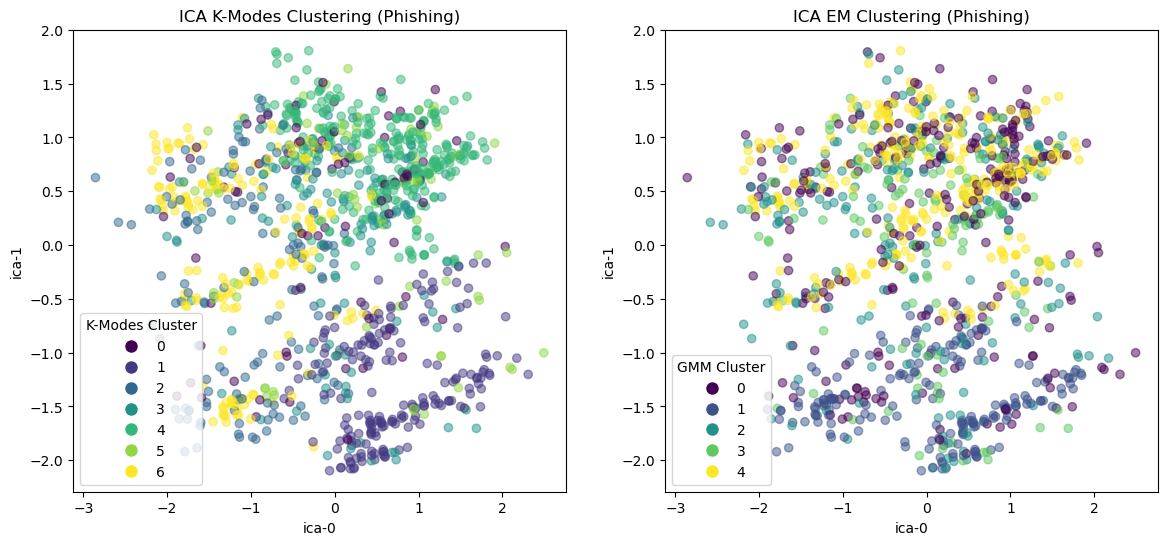

In [24]:
# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Plot K-Means clustering results
plt.subplot(1, 2, 1)
scatter_kmodes = plt.scatter(train_X[features_to_plot[0]], train_X[features_to_plot[1]], c=train_X['KModes_Cluster'], cmap='viridis', alpha=0.5)
plt.title('ICA K-Modes Clustering (Phishing)')
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])
handles_kmodes = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter_kmodes.cmap(scatter_kmodes.norm(cluster)), markersize=10) for cluster in unique_clusters_kmeans]
plt.legend(handles_kmodes, unique_clusters_kmodes, title='K-Modes Cluster', loc='best')

# Plot GMM clustering results
plt.subplot(1, 2, 2)
scatter_gmm = plt.scatter(train_X[features_to_plot[0]], train_X[features_to_plot[1]], c=train_X['GMM_Cluster'], cmap='viridis', alpha=0.5)
plt.title('ICA EM Clustering (Phishing)')
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])
handles_gmm = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter_gmm.cmap(scatter_gmm.norm(cluster)), markersize=10) for cluster in unique_clusters_gmm]
plt.legend(handles_gmm, unique_clusters_gmm, title='GMM Cluster', loc='best')

# Save the plot
plt.savefig('../images/phishing-ica-clustering-comparison.png')

# Show the plot
plt.show()

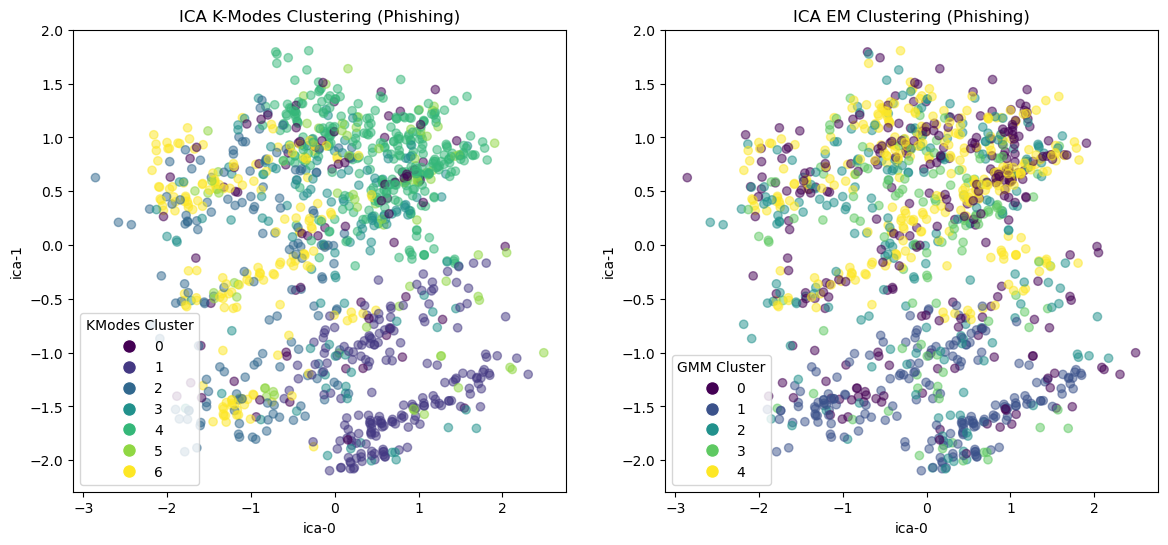

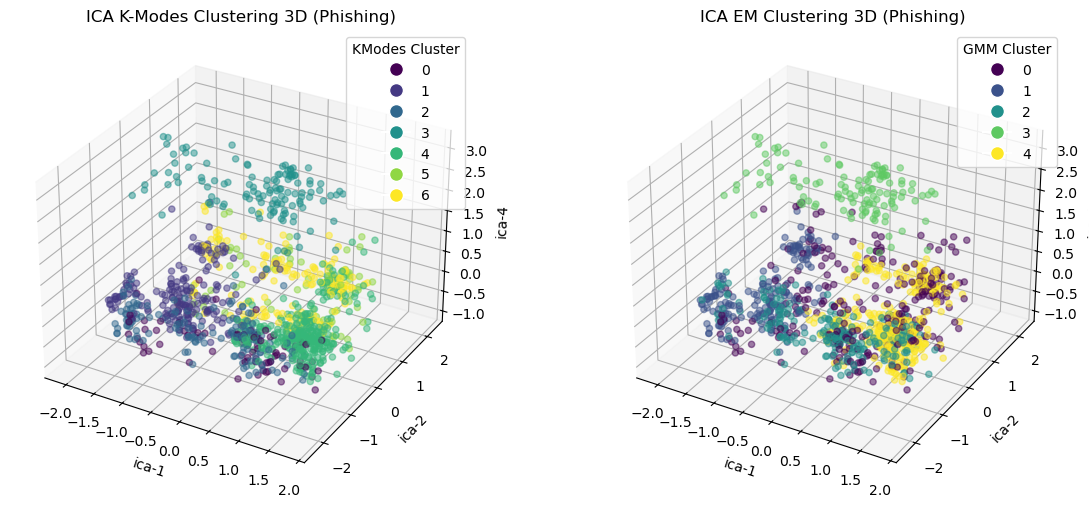

In [30]:
# Define the features you want to plot in 3D
features_to_plot_3d = ['ica-1', 'ica-2', 'ica-4']

# Create a figure for 2D K-Modes and EM clustering results
fig_2d = plt.figure(figsize=(14, 6))

# 2D Plot for K-Modes clustering results
ax1 = fig_2d.add_subplot(121)
scatter_kmodes = ax1.scatter(train_X[features_to_plot[0]], train_X[features_to_plot[1]], c=train_X['KModes_Cluster'], cmap='viridis', alpha=0.5)
ax1.set_title('ICA K-Modes Clustering (Phishing)')
ax1.set_xlabel(features_to_plot[0])
ax1.set_ylabel(features_to_plot[1])
handles_kmodes = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter_kmodes.cmap(scatter_kmodes.norm(cluster)), markersize=10) for cluster in unique_clusters_kmodes]
ax1.legend(handles_kmodes, unique_clusters_kmodes, title='KModes Cluster', loc='best')

# 2D Plot for EM clustering results
ax2 = fig_2d.add_subplot(122)
scatter_gmm = ax2.scatter(train_X[features_to_plot[0]], train_X[features_to_plot[1]], c=train_X['GMM_Cluster'], cmap='viridis', alpha=0.5)
ax2.set_title('ICA EM Clustering (Phishing)')
ax2.set_xlabel(features_to_plot[0])
ax2.set_ylabel(features_to_plot[1])
handles_gmm = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter_gmm.cmap(scatter_gmm.norm(cluster)), markersize=10) for cluster in unique_clusters_gmm]
ax2.legend(handles_gmm, unique_clusters_gmm, title='GMM Cluster', loc='best')

fig_2d.savefig('../images/phishing-comparison-ica-2D.png')
plt.show()

# Create a figure for 3D K-Modes and EM clustering results
fig_3d = plt.figure(figsize=(14, 6))

# 3D Plot for K-Modes clustering results
ax1 = fig_3d.add_subplot(121, projection='3d')
scatter_kmodes_3d = ax1.scatter(train_X[features_to_plot_3d[0]], train_X[features_to_plot_3d[1]], train_X[features_to_plot_3d[2]], c=train_X['KModes_Cluster'], cmap='viridis', alpha=0.5)
ax1.set_title('ICA K-Modes Clustering 3D (Phishing)')
ax1.set_xlabel(features_to_plot_3d[0])
ax1.set_ylabel(features_to_plot_3d[1])
ax1.set_zlabel(features_to_plot_3d[2], rotation=90)
ax1.legend(handles_kmodes, unique_clusters_kmodes, title='KModes Cluster', loc='best')

# 3D Plot for EM clustering results
ax2 = fig_3d.add_subplot(122, projection='3d')
scatter_gmm_3d = ax2.scatter(train_X[features_to_plot_3d[0]], train_X[features_to_plot_3d[1]], train_X[features_to_plot_3d[2]], c=train_X['GMM_Cluster'], cmap='viridis', alpha=0.5)
ax2.set_title('ICA EM Clustering 3D (Phishing)')
ax2.set_xlabel(features_to_plot_3d[0])
ax2.set_ylabel(features_to_plot_3d[1])
ax2.set_zlabel(features_to_plot_3d[2])
ax2.legend(handles_gmm, unique_clusters_gmm, title='GMM Cluster', loc='best')

fig_3d.savefig('../images/phishing-comparison-ica-3D.png')
plt.show()

In [31]:
# Calculate ARI
ari_score = adjusted_rand_score(train_X['KModes_Cluster'], train_X['GMM_Cluster'])
print(f'Phishing Dataset Adjusted Rand Index (ARI) between KModes and GMM clusters ICA: {ari_score}')

# Calculate NMI
nmi_score = normalized_mutual_info_score(train_X['KModes_Cluster'], train_X['GMM_Cluster'])
print(f'Phishing Dataset Normalized Mutual Information (NMI) between KMeans and GMM clusters: ICA {nmi_score}')

Phishing Dataset Adjusted Rand Index (ARI) between KModes and GMM clusters ICA: 0.3302959983026269
Phishing Dataset Normalized Mutual Information (NMI) between KMeans and GMM clusters: ICA 0.47606767388104415


In [ ]:
end = time.perf_counter()
print("Time taken: in min", (end - start)/60)